# Instructions 

- Make sure you’re logged into Kaggle.
- Load the **Video Game Sales dataset** (CSV file is provided in the Kaggle input section).  
- Carefully read through each step and run the cells in order.  
- Do **not** skip steps — each builds on the previous one.  
- Add your own observations wherever possible, especially when exploring graphs.  
- Remember: This is practice for real-world data preprocessing + EDA, so try to think *why* each step is done, not just *how*.  
- At the end, feel free to explore further — add more plots, groupbys, or questions you want to answer!  



Welcome to your next checkpoint on the Synapse road!
Today we’re diving into the Video Game Sales dataset to practice real-world data preprocessing + EDA. Think of this like prepping ingredients before cooking — we’ll clean, slice, and plate the data so insights pop 🍽️

We’ll be using pandas, numpy, matplotlib, and seaborn for this task.
Run the following cell to import them

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

Alright, now that we’ve got our tools ready, let’s bring in the star of the show — the **Video Game Sales dataset** 🎮  

Your task:  
- Load the dataset into a pandas DataFrame.  
- Take a quick peek at the first few rows using.  
- Check the shape of the dataset to see how big this universe is.  

Think of this step as unboxing a new console — gotta see what’s inside first!  


In [ ]:
df = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.shape

(16598, 11)

### 🕹️ Level 1: Meet the Characters  

Now that we’ve unboxed our dataset, let’s get to know the **cast of characters**:  
- What kinds of columns do we have? (numeric, object, etc.)  
- How many missing values are there?  

Your task:  
- To get a quick overview of column types + null values.  
- To double-check the data types.  

This step is like reading the **character bios** before starting a game   


In [ ]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [ ]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

### 🎯 Level 2: Quick Stats Check (Describe the Data)  

Every good gamer checks the **stats screen** before playing  
Now, let’s do the same for our dataset:  

Your task:  
- To get summary statistics for numerical columns.  
- Notice things like average sales, max values, and distribution hints.  

This is like peeking at the **scoreboard** — who’s leading, what’s the high score?   


In [ ]:
df.describe

<bound method NDFrame.describe of         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_S

## 🧹 Level 3: Clean the Map (Missing Values)

Time to sweep the floor before we play.

**Your tasks:**
- Check how many missing values are in each column.
- For this dataset, handle missing values in **`Year`** and **`Publisher`** by removing those rows.
- Re-check to confirm there are **no missing values left**.

> Tip: Do a quick sanity check after cleaning (row count should drop a bit).


In [ ]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
df.shape
df = df.dropna(subset=['Year','Publisher'],axis=0)
df.shape

(16291, 11)

In [ ]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## 🔢 Level 4: Patch the `Year` Column (Data Types)

`Year` often shows up as a float (e.g., `2008.0`) because of missing values earlier.

**Your tasks:**
- Convert **`Year`** to **integer**.
- Re-run a quick `info` to confirm the dtype change.

> If conversion fails, revisit Level 3 — some NaNs may still be lurking.


In [ ]:
df['Year'].astype(int)

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16593    2002
16594    2003
16595    2008
16596    2010
16597    2003
Name: Year, Length: 16291, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB



## 🎮 Level 5: Spotting the Legends  
Now that we’ve explored platforms and genres, let’s look at the **all-time best sellers**.  
Your task:  

List the **Top 5 best-selling video games**.  
We’ll display their **Name, Platform, Genre, and Global Sales**.  

Think of this as the **Hall of Fame of Video Games** 




In [ ]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
best_seller = df.nlargest(5, 'Global_Sales')[['Name', 'Platform', 'Genre', 'Global_Sales']]
display(best_seller)


,Name,Platform,Genre,Global_Sales
0,Wii Sports,Wii,Sports,82.74
1,Super Mario Bros.,NES,Platform,40.24
2,Mario Kart Wii,Wii,Racing,35.82
3,Wii Sports Resort,Wii,Sports,33.00
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,31.37



## 🎮 Level 6: Which Console Ruled the Game?  
Every console/platform has a legacy — but which one released the **most number of games**?  

Count the number of games released on each platform.  
Create a **bar chart** to visualize it.  
Finally, answer: **Which platform has the highest number of releases?** 

  


Text(0, 0.5, 'No of games')

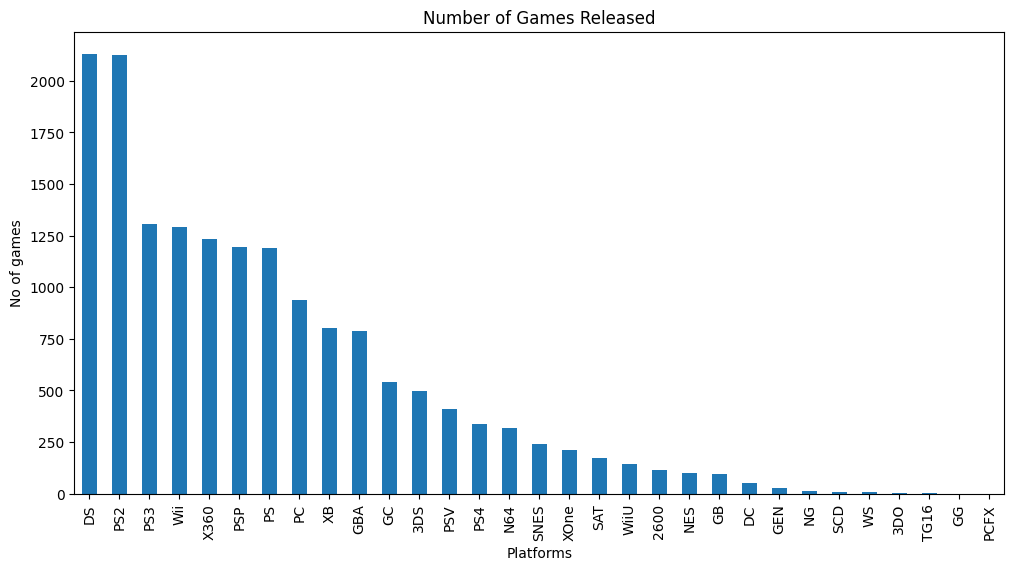

In [ ]:
ax = df['Platform'].value_counts().plot(kind='bar',figsize=(12,6))
ax.set_title("Number of Games Released")
ax.set_xlabel("Platforms")
ax.set_ylabel("No of games")


## 🏢 Level 7: The Big Bosses (Top Publishers)  
Some publishers dominate the industry like final bosses 

Your task:  
- Find the **Top 5 publishers** with the highest **total Global Sales**.  
- Show their contribution using a **pie chart** 

This will help us see who really controlled the gaming world  


Text(0, 0.5, '')

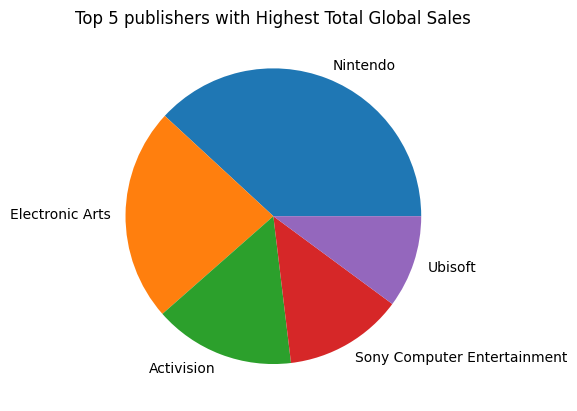

In [ ]:
bx = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5).plot(kind='pie')
bx.set_title("Top 5 publishers with Highest Total Global Sales")
bx.set_ylabel("")



## 🌍 Level 8: Genre Champions in Europe  
Different genres have their own kings in different regions.  
Let’s focus on **Europe (EU Sales)** for now.  

Your task:  
- For **each Genre**, find the **Publisher** that has the highest **total EU Sales**.  
- Print the results as a list (Genre → Top Publisher).  

Think of this as awarding the **regional championship belts**  



In [ ]:
df.groupby('Genre')('Publisher')['EU_Sales'].sort_values(ascending=False)


## 🎯 Level 9: Nintendo’s Golden Year  
Nintendo is one of the biggest names in gaming 🎮  
But… which year did Nintendo achieve its **highest total Global Sales**?  

Your task:  
- Filter the dataset for **Publisher = Nintendo**.  
- Group sales by year.  
- Find the year with the **highest global sales**.  

This is like uncovering the **peak of Nintendo’s power**   



In [ ]:
nintendo = df[df['Publisher']=='Nintendo']
yearSales = nintendo.groupby('Year')['Global_Sales'].sum()
best = yearSales.idxmax()
print(best)
print(yearSales[best])

NameError: name 'df' is not defined


## 🏟️ Final Boss Arena: The Data Playground  

You’ve fought through all the levels ⚔️, now it’s time to explore on your own 🎉  

Your final mission:  
- Choose **any 2–3 plots** (your choice!) that show **interesting patterns** in the data.   

💡 This is your **creative zone** → Think of it as building your own “story” from the dataset.  

When you’re done, share your best plot with the team — let’s see who finds the coolest insight!  



In [ ]:
regions= ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
genre = df.groupby("Genre")[regions].sum()

plt.figure(figsize=(10,6))
sns.heatmap(genre, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Regional Preferences by Genre")
plt.show()

NameError: name 'df' is not defined